# 2024-12-03 Figure 1 plots
This notebook uses `seaborn` to visualize the data found in figure 1. 


In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 
1. The first cell calls `pwd`, which returns the current working directory that the code is working in. 
2. The second cell calls `ls`, which returns the list of files in the current directory.
3. The third cell sets the home directory to a variable, and sets the figure directory to another one.  

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure1/scatter and box plots'

In [3]:
ls

2024-06-05 data for plots.xlsx  figs/
Figure 1 Intensity Plots.ipynb  output/


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Figure1/scatter and box plots' # home directory
figs_dir = home_dir + '/figs/' # directory to hold the figure output
data_dir = home_dir + '/data/' # directory holding the data
outs_dir = home_dir + '/output/' # directory to save any output csv files to 

## Calling in the data
- This script calls in the file called "2024-06-05 data for plots.xlsx". This data is comprised of manually selected values from the metadata master file, which is titled "2024-12-03 Fig1 metadata.xlsx".
- This manually created dataframe has the columns `Genotype`, `phase`, `AC/Cyto Ratio`, and `AC/BC Ratio`, which will be used for plotting.
- This cell calls in the data and asigns it to the variable `data` and prints the first 5 rows using `.head(5)`. 

In [5]:
# reading in data
data = pd.read_excel('2024-06-05 data for plots.xlsx')
data.head(5)

,Genotype,phase,AC/Cyto Ratio,AC/BC Ratio,file name,Unnamed: 5
0,"PP4KO, 5X-PP4 control",interphase,1.750000,NaN,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,NaN
1,"PP4KO, 5X-PP4 control",interphase,1.691358,NaN,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,NaN
2,"PP4KO, 5X-PP4 control",interphase,1.161290,NaN,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,NaN
3,"PP4KO, 5X-PP4 control",interphase,1.651685,NaN,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,NaN
4,"PP4KO, 5X-PP4 control",interphase,1.457447,NaN,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,NaN


## Plotting the data: Figure 1D, AC/Cytoplasm. 
- This cell takes the data in `data` and plots it using `seaborn`.
- The first couple lines set the parameters for the axes and title sizes, and the palette being used.
- The plot is made by first using `sns.stripplot()` to make a scatterplot of the data, and then a boxplot is overlayed on the data using `sns.boxplot()`.
- An unpaired student's T-test is done using the function made at the head of this notebook, and annotations are done to the plot to show the p-value for comparisons between `WT` and `PP4KO`.
- The resulting figure is then saved to the home directory.
- The figure was then further edited in Adobe Illustrator for stylistic preferences. 

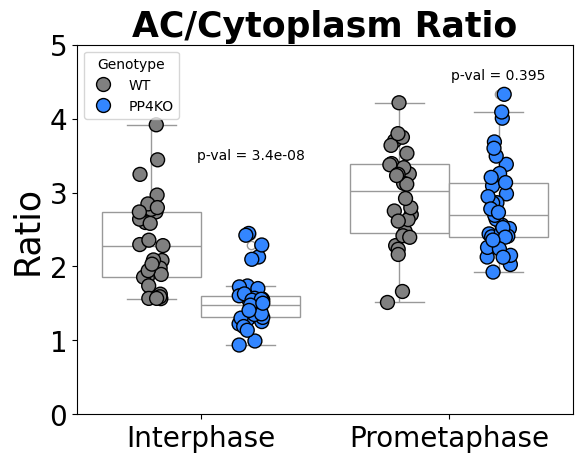

In [6]:
# plotting

p = ['grey', '#3386FF'] # sets palette
axes_title = 25 # axes title size
tick_size = 20 # axes tick size
title = 'AC/Cytoplasm Ratio' # graph title
title_size = 25 # graph title size

# generates stripplot
sns.stripplot(data = data, x = 'phase', y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['WT', 'PP4KO'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

# generates boxplots
sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['WT', 'PP4KO'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('') # removes x axis label
plt.ylabel('Ratio', fontsize = axes_title) # modifies y axis label
plt.xticks(labels = ['Interphase', 'Prometaphase'], ticks = [0,1], size = tick_size) # manually changes x-tick titles
plt.yticks(size = tick_size) # sets y-tick size to match assigned value
plt.ylim(0,5) # sets y-axis limit
plt.title(title, fontsize = title_size, fontweight = 'bold') # sets title parameters

#stats and annotations
param1 = data[(data['Genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO') & (data['phase']=='interphase')]['AC/Cyto Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 10)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+1), ha = 'center')

param3 = data[(data['Genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto Ratio'].dropna()
param4 = data[(data['Genotype']=='PP4KO') & (data['phase']=='prometaphase')]['AC/Cyto Ratio'].dropna()
x = np.round(independent_ttest(param3, param4, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {x}", xy = (1.2, param4.max()+0.2), ha = 'center')

# saving figure
os.chdir(figs_dir)
plt.savefig('AC-Cytoplasm Ratio, WT and PP4KO.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('AC-Cytoplasm Ratio, WT and PP4KO.svg', dpi = 600, bbox_inches = 'tight')
plt.show(); # shows figure in notebook

## Plotting the data: Figure 1C, AC/BC. 

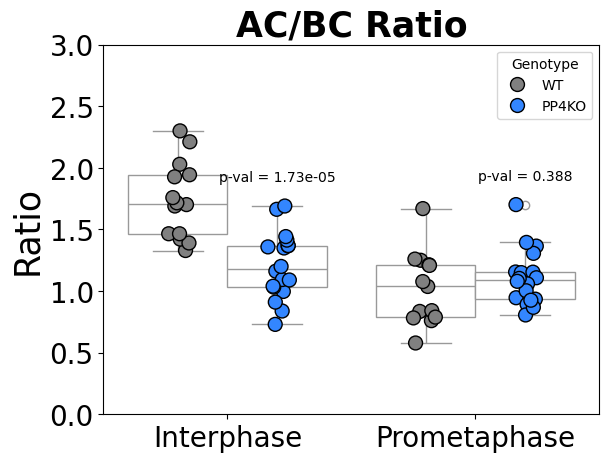

In [7]:
# plotting

p = ['grey', '#3386FF'] 
axes_title = 25
tick_size = 20
title = 'AC/BC Ratio'
title_size = 25

sns.stripplot(data = data, x = 'phase', y = 'AC/BC Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['WT', 'PP4KO'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/BC Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['WT', 'PP4KO'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('')
plt.ylabel('Ratio', fontsize = axes_title)
plt.xticks(labels = ['Interphase', 'Prometaphase'], ticks = [0,1], size = tick_size)
plt.yticks(size = tick_size)
plt.ylim(0,3)
plt.title(title, fontsize = title_size, fontweight = 'bold')

#stats
param1 = data[(data['Genotype']=='WT') & (data['phase']=='interphase')]['AC/BC Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO') & (data['phase']=='interphase')]['AC/BC Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 7)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+0.2), ha = 'center')

param3 = data[(data['Genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC Ratio'].dropna()
param4 = data[(data['Genotype']=='PP4KO') & (data['phase']=='prometaphase')]['AC/BC Ratio'].dropna()
x = np.round(independent_ttest(param3, param4, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {x}", xy = (1.2, param4.max()+0.2), ha = 'center')

os.chdir(figs_dir)
plt.savefig('AC-BC Ratio, WT and PP4KO.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('AC-BC Ratio, WT and PP4KO.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

## Plotting the data: Figure 1F, AC/Cytoplasm in 5X-UAS-PP4::GFP rescue. 
- `-` denotes animals that did not inherit the rescue construct, and are effectively _Pp4_ mutants.
- `+` denotes _Pp4_ animals that did inherit the rescue construct. 

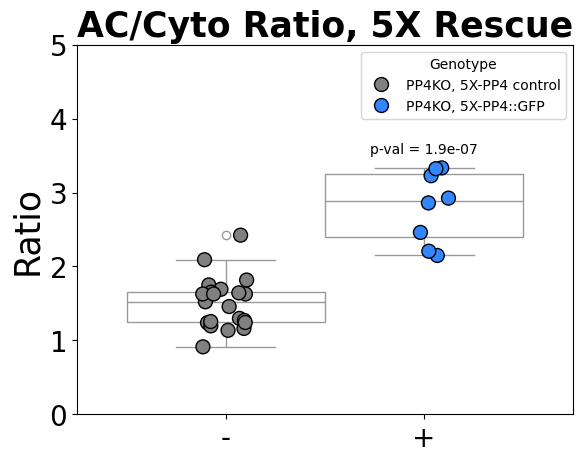

In [8]:
# plotting

p = ['grey', '#3386FF'] 
axes_title = 25
tick_size = 20
title = 'AC/Cyto Ratio, 5X Rescue'
title_size = 25

sns.stripplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 5X-PP4 control', 'PP4KO, 5X-PP4::GFP'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

sns.boxplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 5X-PP4 control', 'PP4KO, 5X-PP4::GFP'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('')
plt.ylabel('Ratio', fontsize = axes_title)
plt.xticks(labels = ['-', '+'], ticks = [-0.2,0.2], size = tick_size, ha = 'center')
plt.yticks(size = tick_size)
plt.ylim(0,5)
plt.title(title, fontsize = title_size, fontweight = 'bold')

#stats
param1 = data[(data['Genotype']=='PP4KO, 5X-PP4 control')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO, 5X-PP4::GFP')]['AC/Cyto Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 8)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+0.2), ha = 'center')

os.chdir(figs_dir)
plt.savefig('AC-Cytoplasm Ratio, 5X rescue.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('AC-Cytoplasm Ratio, 5X rescue.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

## Plotting the data: Figure 1H, AC/Cytoplasm, 10X-UAS-PP4-dead::GFP rescue.  
- `-` denotes animals that did not inherit the rescue construct, and are effectively _Pp4_ mutants.
- `+` denotes _Pp4_ animals that did inherit the rescue construct. 

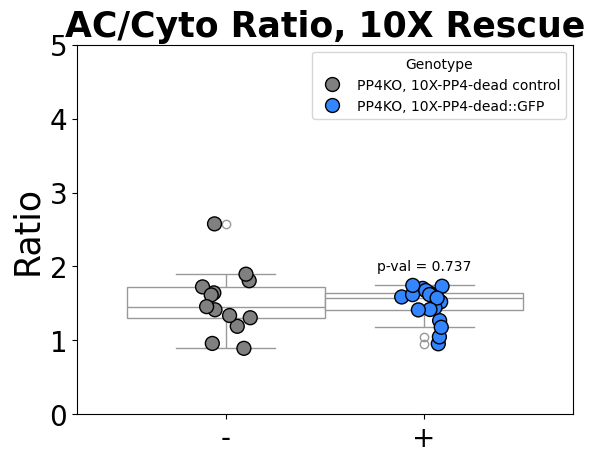

In [9]:
# plotting

p = ['grey', '#3386FF'] 
axes_title = 25
tick_size = 20
title = 'AC/Cyto Ratio, 10X Rescue'
title_size = 25

sns.stripplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

sns.boxplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('')
plt.ylabel('Ratio', fontsize = axes_title)
plt.xticks(labels = ['-', '+'], ticks = [-0.2,0.2], size = tick_size, ha = 'center')
plt.yticks(size = tick_size)
plt.ylim(0,5)
plt.title(title, fontsize = title_size, fontweight = 'bold')

#stats
param1 = data[(data['Genotype']=='PP4KO, 10X-PP4-dead control')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO, 10X-PP4-dead::GFP')]['AC/Cyto Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+0.2), ha = 'center')

os.chdir(figs_dir)
plt.savefig('AC-Cytoplasm Ratio, 10X rescue.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('AC-Cytoplasm Ratio, 10X rescue.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

## Plotting the data: Supplemental Figure 1B, AC/Cytoplasm, 10X-UAS-PP4-dead::GFP rescue, 2X MTOC, 25C.  
- `-` denotes animals that did not inherit the rescue construct, and are effectively _Pp4_ mutants.
- `+` denotes _Pp4_ animals that did inherit the rescue construct. 

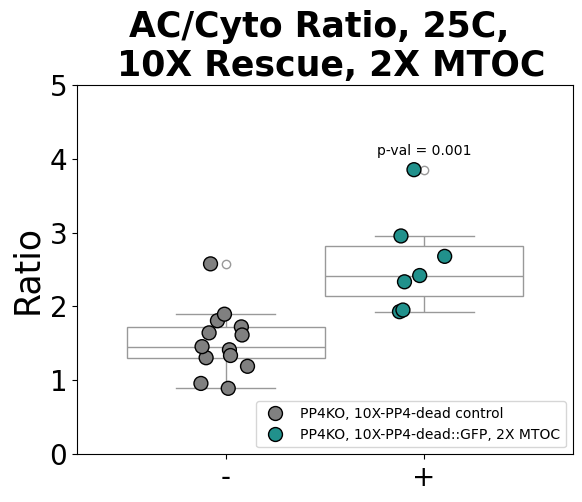

In [10]:
# plotting

p = ['grey', '#21918c'] 
axes_title = 25
tick_size = 20
title = 'AC/Cyto Ratio, 25C, \n 10X Rescue, 2X MTOC'
title_size = 25

sns.stripplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP, 2X MTOC'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

sns.boxplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP, 2X MTOC'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('')
plt.ylabel('Ratio', fontsize = axes_title)
plt.xticks(labels = ['-', '+'], ticks = [-0.2,0.2], size = tick_size, ha = 'center')
plt.yticks(size = tick_size)
plt.ylim(0,5)
plt.title(title, fontsize = title_size, fontweight = 'bold')

#stats
param1 = data[(data['Genotype']=='PP4KO, 10X-PP4-dead control')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO, 10X-PP4-dead::GFP, 2X MTOC')]['AC/Cyto Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+0.2), ha = 'center')

os.chdir(figs_dir)
plt.legend(loc = 'lower right')
plt.savefig('AC-Cytoplasm Ratio, 10X rescue 2X MTOC sup.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('AC-Cytoplasm Ratio, 10X rescue 2X MTOC sup.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

## Plotting the data: Supplemental Figure 1D, AC/Cytoplasm, 10X-UAS-PP4-dead::GFP rescue, 18C.  
- `-` denotes animals that did not inherit the rescue construct, and are effectively _Pp4_ mutants.
- `+` denotes _Pp4_ animals that did inherit the rescue construct. 

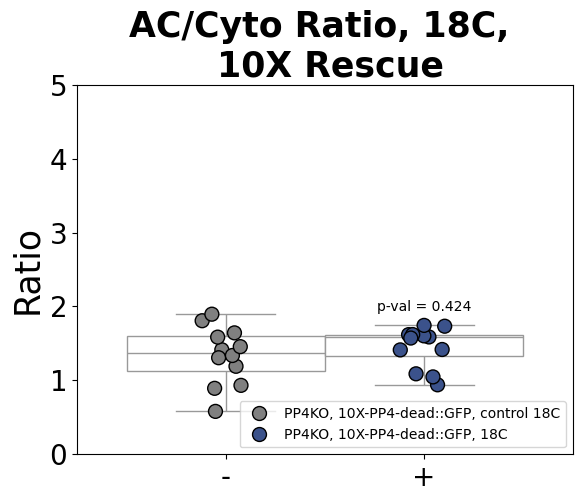

In [11]:
# plotting

p = ['grey', '#3b528b'] 
axes_title = 25
tick_size = 20
title = 'AC/Cyto Ratio, 18C, \n 10X Rescue'
title_size = 25

sns.stripplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 10X-PP4-dead::GFP, control 18C', 'PP4KO, 10X-PP4-dead::GFP, 18C'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

sns.boxplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 10X-PP4-dead::GFP, control 18C', 'PP4KO, 10X-PP4-dead::GFP, 18C'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('')
plt.ylabel('Ratio', fontsize = axes_title)
plt.xticks(labels = ['-', '+'], ticks = [-0.2,0.2], size = tick_size, ha = 'center')
plt.yticks(size = tick_size)
plt.ylim(0,5)
plt.title(title, fontsize = title_size, fontweight = 'bold')

#stats
param1 = data[(data['Genotype']=='PP4KO, 10X-PP4-dead::GFP, control 18C')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO, 10X-PP4-dead::GFP, 18C')]['AC/Cyto Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+0.2), ha = 'center')

os.chdir(figs_dir)
plt.legend(loc = 'lower right')
plt.savefig('AC-Cytoplasm Ratio, 10X rescue 18C sup.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('AC-Cytoplasm Ratio, 10X rescue 18C sup.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

# Stats Table

In [12]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [13]:
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'PP4KO', 'interphase', 'AC/Cyto Ratio']
t2 = ['WT', 'PP4KO', 'prometaphase', 'AC/Cyto Ratio']

t3 = ['WT', 'PP4KO', 'interphase', 'AC/BC Ratio']
t4 = ['WT', 'PP4KO', 'prometaphase', 'AC/BC Ratio']

t5 = ['PP4KO, 5X-PP4 control', 'PP4KO, 5X-PP4::GFP', 'interphase', 'AC/Cyto Ratio']

t6 = ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP', 'interphase', 'AC/Cyto Ratio']
t7 = ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP, 2X MTOC', 'interphase', 'AC/Cyto Ratio']

t8 = ['PP4KO, 10X-PP4-dead::GFP, control 18C', 'PP4KO, 10X-PP4-dead::GFP, 18C', 'interphase', 'AC/Cyto Ratio']

tests = [t1, t2, t3, t4, t5, t6, t7, t8]

In [14]:
for i in range(0, len(tests)):
    stats_table.loc[i, 'control variable'] = tests[i][0]
    stats_table.loc[i, 'experimental variable'] = tests[i][1]
    stats_table.loc[i, 'phase'] = tests[i][2]
    stats_table.loc[i, 'y-value'] = tests[i][3]
    
    param1 = data[(data['Genotype']==tests[i][0]) & (data['phase']==tests[i][2])][tests[i][3]].dropna()
    param2 = data[(data['Genotype']==tests[i][1]) & (data['phase']==tests[i][2])][tests[i][3]].dropna()

    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)

    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()

    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    test = independent_ttest(param1, param2, 0.05)
    stats_table.loc[i, 'test statistic'] = test[0]
    stats_table.loc[i, 'degrees of freedom'] = test[1]
    stats_table.loc[i, 'critical value'] = test[2]
    stats_table.loc[i, 'p-value'] = test[3]


    if test[3] < 0.0001:
        sig = "****"
    elif test[3] < 0.001:
        sig = "***"
    elif test[3] < 0.01:
        sig = "**"
    elif test[3] < 0.05:
        sig = "*"
    elif test[3] > 0.05:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig
    
stats_table['test'] = "Unpaired Student's T-test"
stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,interphase,Unpaired Student's T-test,AC/Cyto Ratio,29,37,2.33E+00,1.53E+00,6.13E-01,3.54E-01,6.28E+00,64,1.67E+00,3.40E-08,****
1,WT,PP4KO,prometaphase,Unpaired Student's T-test,AC/Cyto Ratio,28,37,2.94E+00,2.80E+00,6.56E-01,6.03E-01,8.56E-01,63,1.67E+00,3.95E-01,ns
2,WT,PP4KO,interphase,Unpaired Student's T-test,AC/BC Ratio,14,18,1.74E+00,1.21E+00,3.09E-01,2.68E-01,5.11E+00,30,1.70E+00,1.73E-05,****
3,WT,PP4KO,prometaphase,Unpaired Student's T-test,AC/BC Ratio,13,18,1.02E+00,1.11E+00,2.95E-01,2.23E-01,-8.76E-01,29,1.70E+00,3.88E-01,ns
4,"PP4KO, 5X-PP4 control","PP4KO, 5X-PP4::GFP",interphase,Unpaired Student's T-test,AC/Cyto Ratio,21,8,1.51E+00,2.81E+00,3.51E-01,4.86E-01,-6.93E+00,27,1.70E+00,1.89E-07,****
5,"PP4KO, 10X-PP4-dead control","PP4KO, 10X-PP4-dead::GFP",interphase,Unpaired Student's T-test,AC/Cyto Ratio,13,17,1.52E+00,1.48E+00,4.39E-01,2.40E-01,3.39E-01,28,1.70E+00,7.37E-01,ns
6,"PP4KO, 10X-PP4-dead control","PP4KO, 10X-PP4-dead::GFP, 2X MTOC",interphase,Unpaired Student's T-test,AC/Cyto Ratio,13,7,1.52E+00,2.59E+00,4.39E-01,6.67E-01,-3.80E+00,18,1.73E+00,1.31E-03,**
7,"PP4KO, 10X-PP4-dead::GFP, control 18C","PP4KO, 10X-PP4-dead::GFP, 18C",interphase,Unpaired Student's T-test,AC/Cyto Ratio,12,12,1.34E+00,1.45E+00,3.89E-01,2.76E-01,-8.14E-01,22,1.72E+00,4.24E-01,ns


## Resets directory back to home dir. 

In [15]:
# saves output stats table
os.chdir(outs_dir)
#stats_table.to_csv('FIG1 stats.csv')
os.chdir(home_dir)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, mannwhitneyu

def is_parametric(data1, data2, alpha=0.05, show_histograms=True):
    """
    Determines if data is parametric and suitable for an unpaired Student's t-test.
    If assumptions are violated, it suggests a Mann-Whitney U test as an alternative.
    Generates histograms for visual assessment of normality.

    Parameters:
    - data1, data2: Arrays or lists of numeric data for the two groups to compare.
    - alpha: Significance level for the tests (default is 0.05).
    - show_histograms: If True, displays histograms with KDE to visualize data distribution.

    Returns:
    - A dictionary with:
      - 'continuous': True if both datasets are numeric.
      - 'normality': True if both datasets pass the Shapiro-Wilk test for normality.
      - 'equal_variance': True if the two datasets pass Levene's test for equal variances.
      - 'suitable_for_ttest': True if all assumptions are met.
      - 'suggested_test': 't-test' or 'Mann-Whitney U test' depending on assumptions.
    """
    # Check if data is continuous
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    
    if not continuous:
        return {
            'continuous': False,
            'normality': None,
            'equal_variance': None,
            'suitable_for_ttest': False,
            'suggested_test': "Non-parametric test (Mann-Whitney U test)"
        }
    
    # Check normality (Shapiro-Wilk test)
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2
    
    # Check homogeneity of variances (Levene's test)
    equal_variance = levene(data1, data2).pvalue > alpha
    
    # Determine overall suitability for t-test
    suitable_for_ttest = continuous and normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    # Generate histograms for visual inspection
    if show_histograms:
        plt.figure(figsize=(10, 5))
        
        # Plot histogram for data1
        plt.subplot(1, 2, 1)
        sns.histplot(data1, kde=True, bins=10, color="skyblue", label="Group 1")
        plt.title("Histogram of Group 1")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        
        # Plot histogram for data2
        plt.subplot(1, 2, 2)
        sns.histplot(data2, kde=True, bins=10, color="lightcoral", label="Group 2")
        plt.title("Histogram of Group 2")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        
        plt.tight_layout()
        plt.show()

    # Print suggestion for alternative test if assumptions fail
    if not suitable_for_ttest:
        print("\nAssumptions for an unpaired t-test are violated. "
              "You can use the Mann-Whitney U test as an alternative.")
        mann_u_stat, mann_u_p = mannwhitneyu(data1, data2, alternative='two-sided')
        
        # Format p-value to scientific notation if very small
        formatted_p = f"{mann_u_p:.5e}"
        print(f"Mann-Whitney U test p-value: {formatted_p}")
    
    return {
        'continuous': continuous,
        'normality': normality,
        'equal_variance': equal_variance,
        'suitable_for_ttest': suitable_for_ttest,
        'suggested_test': suggested_test
    }


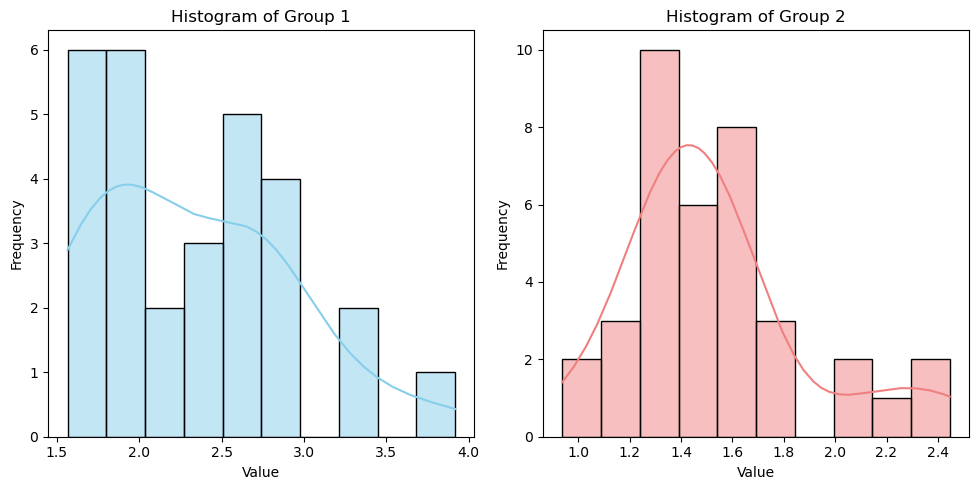


Assumptions for an unpaired t-test are violated. You can use the Mann-Whitney U test as an alternative.
Mann-Whitney U test p-value: 2.38617e-08
{'continuous': True, 'normality': False, 'equal_variance': False, 'suitable_for_ttest': False, 'suggested_test': 'Mann-Whitney U test'}


In [26]:
param1 = data[(data['Genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO') & (data['phase']=='interphase')]['AC/Cyto Ratio'].dropna()

result = is_parametric(param1, param2)
print(result)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns=['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                    'control n', 'experimental n',
                                    'control mean', 'experimental mean',
                                    'control stdev', 'experimental stdev',
                                    'test statistic', 'degrees of freedom', 
                                    'critical value', 'p-value', 'significance'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
tests = [
    ['WT', 'PP4KO', 'interphase', 'AC/Cyto Ratio'],
    ['WT', 'PP4KO', 'prometaphase', 'AC/Cyto Ratio'],
    ['WT', 'PP4KO', 'interphase', 'AC/BC Ratio'],
    ['WT', 'PP4KO', 'prometaphase', 'AC/BC Ratio'],
    ['PP4KO, 5X-PP4 control', 'PP4KO, 5X-PP4::GFP', 'interphase', 'AC/Cyto Ratio'],
    ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP', 'interphase', 'AC/Cyto Ratio'],
    ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP, 2X MTOC', 'interphase', 'AC/Cyto Ratio'],
    ['PP4KO, 10X-PP4-dead::GFP, control 18C', 'PP4KO, 10X-PP4-dead::GFP, 18C', 'interphase', 'AC/Cyto Ratio']
]

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['Genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['Genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
os.chdir(outs_dir)
stats_table.to_csv('FIG1 stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,interphase,Mann-Whitney U Test,AC/Cyto Ratio,29,37,2.33E+00,1.53E+00,6.13E-01,3.54E-01,9.69E+02,N/A,N/A,2.38617e-08,****
1,WT,PP4KO,prometaphase,Mann-Whitney U Test,AC/Cyto Ratio,28,37,2.94E+00,2.80E+00,6.56E-01,6.03E-01,6.08E+02,N/A,N/A,2.35755e-01,ns
2,WT,PP4KO,interphase,Unpaired Student's T-test,AC/BC Ratio,14,18,1.74E+00,1.21E+00,3.09E-01,2.68E-01,5.20E+00,30,N/A,1.31712e-05,****
3,WT,PP4KO,prometaphase,Unpaired Student's T-test,AC/BC Ratio,13,18,1.02E+00,1.11E+00,2.95E-01,2.23E-01,-9.17E-01,29,N/A,3.66850e-01,ns
4,"PP4KO, 5X-PP4 control","PP4KO, 5X-PP4::GFP",interphase,Unpaired Student's T-test,AC/Cyto Ratio,21,8,1.51E+00,2.81E+00,3.51E-01,4.86E-01,-8.03E+00,27,N/A,1.24200e-08,****
5,"PP4KO, 10X-PP4-dead control","PP4KO, 10X-PP4-dead::GFP",interphase,Mann-Whitney U Test,AC/Cyto Ratio,13,17,1.52E+00,1.48E+00,4.39E-01,2.40E-01,1.13E+02,N/A,N/A,9.33292e-01,ns
6,"PP4KO, 10X-PP4-dead control","PP4KO, 10X-PP4-dead::GFP, 2X MTOC",interphase,Unpaired Student's T-test,AC/Cyto Ratio,13,7,1.52E+00,2.59E+00,4.39E-01,6.67E-01,-4.31E+00,18,N/A,4.20055e-04,***
7,"PP4KO, 10X-PP4-dead::GFP, control 18C","PP4KO, 10X-PP4-dead::GFP, 18C",interphase,Mann-Whitney U Test,AC/Cyto Ratio,12,12,1.34E+00,1.45E+00,3.89E-01,2.76E-01,5.80E+01,N/A,N/A,4.35731e-01,ns
